In [491]:
import torch
import matplotlib.pyplot as plt

In [492]:
# generate data - independent variable
x = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
x

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [493]:
# Generate data - dependent variable based on a simple line equation
COEFFICIENT = 2
INTERCEPT = 10
y=x*COEFFICIENT+INTERCEPT
y

tensor([[10.0000],
        [10.0400],
        [10.0800],
        [10.1200],
        [10.1600],
        [10.2000],
        [10.2400],
        [10.2800],
        [10.3200],
        [10.3600],
        [10.4000],
        [10.4400],
        [10.4800],
        [10.5200],
        [10.5600],
        [10.6000],
        [10.6400],
        [10.6800],
        [10.7200],
        [10.7600],
        [10.8000],
        [10.8400],
        [10.8800],
        [10.9200],
        [10.9600],
        [11.0000],
        [11.0400],
        [11.0800],
        [11.1200],
        [11.1600],
        [11.2000],
        [11.2400],
        [11.2800],
        [11.3200],
        [11.3600],
        [11.4000],
        [11.4400],
        [11.4800],
        [11.5200],
        [11.5600],
        [11.6000],
        [11.6400],
        [11.6800],
        [11.7200],
        [11.7600],
        [11.8000],
        [11.8400],
        [11.8800],
        [11.9200],
        [11.9600]])

In [494]:
len(x), len(y)

(50, 50)

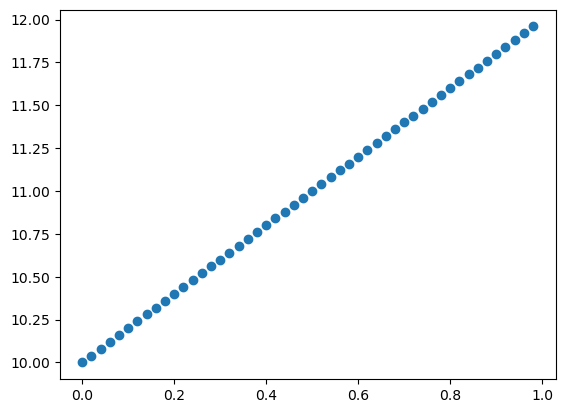

In [495]:
# Plot the original data
plt.scatter(x,y)
plt.show()

In [496]:
# Split the data into train (80%) and test (20%)
x_train = x[:40]
y_train = y[:40]
x_test = x[40:]
y_test = y[40:]

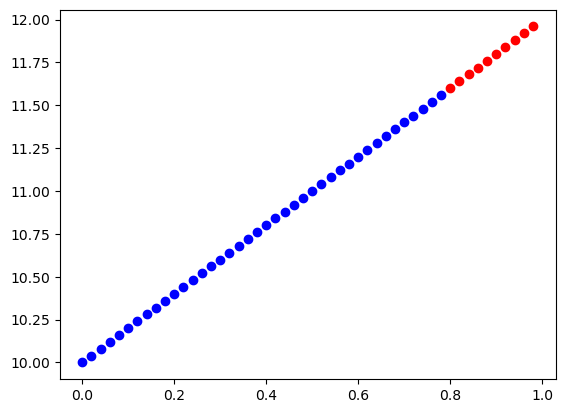

In [497]:
# Plot training and test data
plt.scatter(x_train,y_train,color="blue")
plt.scatter(x_test,y_test,color="red")
plt.show()

In [498]:
# Prepare the regression model
class RegressionModel01(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(in_features=1, out_features = 1)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [499]:
# Instantiate the model with an initial manual seed
torch.manual_seed(30)
regressionModel = RegressionModel01()
regressionModel, regressionModel.state_dict()

(RegressionModel01(
   (linear): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear.weight', tensor([[0.8015]])),
              ('linear.bias', tensor([0.4927]))]))

In [500]:
# Loss function - L1Loss
loss_fn = torch.nn.L1Loss()
loss_fn

L1Loss()

In [501]:
# Optimizer - Stochastic Gradient Descent
LEARNING_RATE=0.2
optimizer = torch.optim.SGD(regressionModel.parameters(), lr=LEARNING_RATE)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.2
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [502]:
# Run the training loop
torch.manual_seed(30)

epochs = 100
for epoch in range(epochs):
    regressionModel.train()
    y_pred = regressionModel(x_train)
    loss = loss_fn(y_pred, y_train)
    if epoch % 10 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 | Loss: 9.974693298339844
Epoch: 10 | Loss: 7.670494079589844
Epoch: 20 | Loss: 5.366293907165527
Epoch: 30 | Loss: 3.0620951652526855
Epoch: 40 | Loss: 0.7578969597816467
Epoch: 50 | Loss: 0.3786441683769226
Epoch: 60 | Loss: 0.30941060185432434
Epoch: 70 | Loss: 0.2408413589000702
Epoch: 80 | Loss: 0.17206713557243347
Epoch: 90 | Loss: 0.10337083041667938


In [503]:
# Evaluate the model
regressionModel.eval()
with torch.inference_mode():
    y_pred = regressionModel(x_test)
    loss = loss_fn(y_pred, y_test)

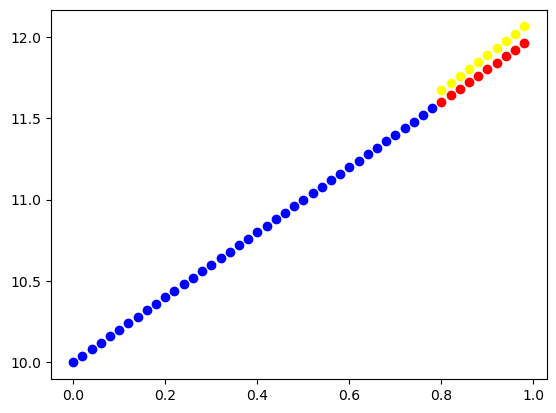

In [504]:
# Plot training, test and predicted data
plt.scatter(x_train,y_train,color="blue")
plt.scatter(x_test,y_test,color="red")
plt.scatter(x_test,y_pred,color="yellow")
plt.show()